In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import sparse,  io, linalg
import pickle
from tqdm import tqdm_notebook as tqdm
import networkx as nx
import snap
from utils import *
import utils
#%load_ext autoreload
#%autoreload 2

In [12]:
#G = read_graph("/Users/rohan/Dropbox/Work/CMU/Coursework/15-826/workspace/collaboration/CA-AstroPh.txt")
collaboration = np.loadtxt('/Users/rohan/Dropbox/Work/CMU/Coursework/15-826/workspace/collaboration/CA-AstroPh.txt',dtype=int)

indices = []
num_intervals = 10
t_max = collaboration.shape[0]
epoch_num = 5
#epoch_ind_begin = int((epoch_num - 1)*t_max/num_intervals)
epoch_ind_begin = 0;
epoch_ind_end = int((epoch_num)*t_max/num_intervals)

In [13]:
G = nx.Graph()
for i in tqdm(range(epoch_ind_begin,epoch_ind_end)):
    if G.has_edge(collaboration[i,0],collaboration[i,1]):
        G[collaboration[i,0]][collaboration[i,1]]['weight']+=1
    else:
        G.add_edge(collaboration[i,0],collaboration[i,1],weight=1)


<IPython.core.display.Javascript object>


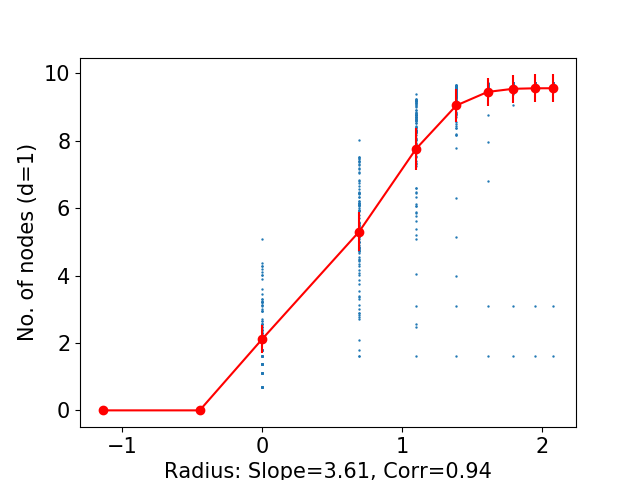

/usr/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1907: RuntimeWarning: invalid value encountered in multiply
  lower_bound = self.a * scale + loc
/usr/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1908: RuntimeWarning: invalid value encountered in multiply
  upper_bound = self.b * scale + loc


In [16]:
distances=[0.32,0.64,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0]
pwl = self_similarity(G,distances,size=100)
plot_log_log_summary(np.asarray(pwl),"Radius", "No. of nodes (d=1)",discrete=True,summary=np.mean)